In [ ]:
!pip install konlpy
!pip install wordcloud

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 460kB 50.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 한글폰트 설정 -> 실행후 런타임 다시시작 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,412 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
from konlpy.tag import Twitter 
from collections import Counter

In [ ]:
# import pandas as pd
# df = pd.io.parsers.read_csv("data/starbucks_review.csv")
# sliceData1 = df.loc[:, '감정']    # '감정' 열만 자름
# sliceData2 = df.loc[:, '리뷰']   # '리뷰' 열만 자름
# sliceData = pd.concat([sliceData1,sliceData2],axis=1)

# sliceData.to_csv('data/new_starbucks_review.csv', index=False)    # csv로 저장

# new_starbucks_review = pd.io.parsers.read_csv('data/new_starbucks_review.csv')

In [ ]:
# # DataFrame 이나 Serises 를 txt 파일로 깔끔하게 바꿀경우 (이건 tsv)
# new_starbucks_review.to_csv('data/new_starbucks_review.txt', index=False, header=None, sep="\t")

In [ ]:
# # txt파일 열기
# f = open('drive/MyDrive/dataset/starbucks_good_review.txt', 'r')
# while True:
#     lists = f.readline()
#     if not list: break
#     print(lists)
# f.close()

In [ ]:
%cd /content/drive/MyDrive/sentiment

/content/drive/MyDrive/sentiment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
pred_1 = pd.read_csv('sb_20M_bad.csv')

In [ ]:
pred_1.head()

,Unnamed: 0,매장,시간,별점,리뷰,싸이트,감정,pred
0,93,스타벅스 역삼아레나빌딩점,2020-11-20,3.0,불친절합니다,1,보통,나쁨
1,114,스타벅스 역삼아레나빌딩점,2020-10-21,2.5,사람많음,1,보통,나쁨
2,134,스타벅스 역삼아레나빌딩점,2020-09-20,4.0,여기는 베이커리가 금방 떨어져요. 젊은 직장인들이 많습니다.,1,좋음,나쁨
3,148,스타벅스 역삼아레나빌딩점,2020-08-16,3.5,커피맛이 별로ㅜㅜㅜ,1,보통,나쁨
4,213,스타벅스 역삼아레나빌딩점,2020-05-10,5.0,케이크가 다 떨어졌어요 아쉬워요,1,좋음,나쁨


In [ ]:
pred_1.drop(['Unnamed: 0', '시간',	'별점', '싸이트',	'감정'], axis=1, inplace=True)

In [ ]:
pred_1.head()

,매장,리뷰,pred
0,스타벅스 역삼아레나빌딩점,불친절합니다,나쁨
1,스타벅스 역삼아레나빌딩점,사람많음,나쁨
2,스타벅스 역삼아레나빌딩점,여기는 베이커리가 금방 떨어져요. 젊은 직장인들이 많습니다.,나쁨
3,스타벅스 역삼아레나빌딩점,커피맛이 별로ㅜㅜㅜ,나쁨
4,스타벅스 역삼아레나빌딩점,케이크가 다 떨어졌어요 아쉬워요,나쁨


In [ ]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

In [ ]:
print(pred_1['리뷰'].values)

['불친절합니다' '사람많음' '여기는 베이커리가 금방 떨어져요. 젊은 직장인들이 많습니다.' ...
 '장소가 큰 탓에 많은 콘센트와 자리를 기대하고 가시는 분들이 많겠지만 여전히 사람이 많고 여전히 앉을 자리가 없고 여전히 소리가 울린다 콘센트도 많지 않아 작업하기도 힘들고 의자 사이에 간격이 넓어 안그래도 시끄러운 공간속에서 대화도 잘 안들린다 이런 까닭에 맞은편에 있는 스벅에 주로 가다가도 집에서 더 가까운 리저브에 한번쯤 들르게 되는데 그때마다 고개를 저으며 밖으로 금방 나오게 된다 장사가 그렇게 잘 되니 없어지진 않을 듯 하다'
 '청담동 한 가운데 한적하고 조용한 스타벅스 이지만 리저브 음료는 너무 생각보다 별로였어요. 요즘 맛있고 괜찮은 카페가 많아서 그런지 오늘따라 유독 더 그리 느껴졌어요'
 '사람이 늘 많아요. 주문하면 최소 10분이상 소요. 리저브 자리가 아주 작게 있어요. 규모에 비해 케이크나 샌드위치 종류가 많은 편은 아닌듯. 그게 좀 아쉬워요!']


In [ ]:
len(pred_1['리뷰'].values)

9734

In [ ]:
pred_bad_reviews = pred_1['리뷰'].values.tolist()

In [ ]:
# 품사 태깅
okt = Okt()
pos_lists = [] 

for sentence in pred_bad_reviews: 
  pos_lists.append(okt.pos(sentence)) 
  
print(pos_lists)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
all_lists = [] 

for sentence in pos_lists: 
  for word, tag in sentence : 
   if tag in ['Noun', 'Adjective', 'Verb'] and ("것" not in word) and ("내" not in word) and ("나" not in word)and ("수"not in word) and ("게"not in word) and ("말"not in word):

        all_lists.append(word)
        
print(all_lists)

['불친절합니다', '사람', '많음', '여기는', '베이커리', '금방', '떨어져요', '젊은', '직장인', '많습니다', '커피', '맛', '별로', '케이크', '떨어졌어요', '아쉬워요', '불친절해요', '테이블', '줄였네요', '물러가라', '주문', '받는', '남자', '직원', '불친절해서', '커피', '맛', '의심', '스럽네요', '테이크아웃', '한다고', '했는데', '번', '같은', '얘기', '하면서', '비아', '거리', '실망', '스럽네요', '친절', '도', '좀', '전반', '종류', '적네요', '난리', '직원', '좀', '직원', '불친절', '사람', '많아요', '커피', '쓰고', '정신', '없고', '화장실', '딸', '한', '칸', '아이스', '커피잔', '플라스틱', '뭐', '항상', '사람', '많아요', '조금', '시끄러워요', '테이블', '충전', '안되는', '일', '하러', '갔는데', '못', '왔어요', '시끄러', '움', '시끄러', '화장실', '인실이고', '불편해용', '의자', '불편해용', '넓은데신', '위치', '사람', '아닌', '와서', '떠들다가', '쓰레기', '버리고', '그냥', '감', '기프티콘', '메뉴', '바꾸는', '걸', '제대로', '이야기', '해주셔서', '엉뚱한', '메뉴', '더', '골랐어요', '와이파이', '안된다고', '보면', '됩니다', '카페', '와이파이', '안되는', '곳', '봐요', '들어가면', '된다는데', '절대', '안되고', '모바일', '썼네요', '친절한지는', '모르겠구', '콘센트', '있는', '자리', '아주', '많지는', '않아요', '매장', '추워요', '문', '좀', '닫아주세요', '최악', '토요일', '오후', '시간대', '주문', '받은', '파트너', '응대', '해주셨는데', '포장', '해준', '염색', '단발머리', '여자', '파트너', '불

In [ ]:
count = Counter(all_lists)

all_words = dict(count.most_common())

all_words

{'사람': 2114,
 '직원': 1169,
 '자리': 1025,
 '좀': 809,
 '매장': 800,
 '주문': 750,
 '맛': 693,
 '많아요': 641,
 '별로': 634,
 '음료': 602,
 '커피': 583,
 '스벅': 469,
 '불친절': 414,
 '스타벅스': 414,
 '항상': 410,
 '곳': 377,
 '없어요': 375,
 '때': 375,
 '많음': 333,
 '많아서': 316,
 '화장실': 298,
 '라떼': 285,
 '안': 280,
 '하는': 279,
 '기분': 273,
 '다른': 268,
 '손님': 265,
 '했는데': 261,
 '시간': 256,
 '넘': 238,
 '테이블': 229,
 '조금': 222,
 '진짜': 220,
 '분': 208,
 '지점': 206,
 '그냥': 203,
 '많고': 200,
 '더': 199,
 '층': 199,
 '해서': 197,
 '없음': 193,
 '여기': 190,
 '좌석': 189,
 '왜': 189,
 '파트너': 187,
 '오늘': 185,
 '남자': 184,
 '할': 181,
 '불친절해요': 176,
 '주차': 175,
 '늘': 175,
 '다시': 173,
 '없어서': 172,
 '때문': 169,
 '없고': 167,
 '같아요': 167,
 '서비스': 159,
 '처음': 158,
 '잘': 154,
 '아쉬워요': 150,
 '요': 150,
 '여자': 146,
 '함': 145,
 '일': 141,
 '사이렌': 141,
 '테이크아웃': 139,
 '메뉴': 139,
 '정신': 137,
 '해': 136,
 '좁아요': 135,
 '많아': 134,
 '아메리카노': 134,
 '느낌': 131,
 '응대': 129,
 '없네요': 129,
 '제': 129,
 '점': 129,
 '개': 128,
 '달라': 126,
 '점심시간': 124,
 '앉을': 124,
 '않아요': 123,
 '방

In [ ]:
token = {'사람': 2114,
 '직원': 1169,
 '자리': 1025,
 '매장': 800,
 '주문': 750,
 '맛': 693,
 '많아요': 641,
 '별로': 634,
 '음료': 602,
 '불친절': 414,
 '없어요': 375,
 '화장실': 298,
 '시간': 256,
 '테이블': 229,
 '없음': 193,
 '좌석': 189,
 '불친절해요': 176,
 '주차': 175,
 '없고': 167,
 '서비스': 159,
 '처음': 158,
 '잘': 154,
 '아쉬워요': 150,
 '요': 150,
 '여자': 146,
 '함': 145,
 '일': 141,
 '사이렌': 141,
 '테이크아웃': 139,
 '메뉴': 139,
 '정신': 137,
 '좁아요': 135,
 '많아': 134,
 '아메리카노': 134,
 '느낌': 131,
 '응대': 129,
 '없네요': 129,
 '달라': 126,
 '앉을': 124,
 '않아요': 123,
 '방문': 123,
 '이용': 123,
 '없는': 121,
 '결제': 118,
 '얼음': 116,
 '불편해요': 113,
 '콘센트': 109,
 '마스크': 109,
 '알바': 105,
 '의자': 104,
 '최악': 102,
 '시끄러워요': 100,
 '밍밍': 93,
 '계산': 92,
 '좁고': 90,
 '교육': 90,
 '잘못': 87,
 '못': 86,
 '불편': 83,
 '돈': 83,
 '소리': 82,
 '공부': 81,
 '오더': 80,
 '표정': 79,
 '빨대': 79,
 '불친절함': 79,
 '관리': 73,
 '시끄러': 71,
 '마감': 71,
 '불친절한': 69,
 '부족해요': 67,
 '작아요': 65,
 '협소해': 62,
 '길어요': 59,
 '줌': 59,
 '대기': 57,
 '없어': 56,
 '와이파이': 55,
 '원두': 55,
 '불친절하네요': 54,
 '협소': 54,
 '실망': 53,
 '아쉬웠어요': 52,
 '냄새': 52,
 '짜증': 51,
 '당황': 51,
 '부족': 47,
 '작은': 45,
 '시끄럽고': 45,
 '북적': 44,
 '덜': 43,
 '청소': 43,
 '좁아서': 43,
 '신경': 42,
 '안되는': 41,
 '가격': 41,
 '문제': 41,
 '충전': 40,
 '불친절하고': 40,
 '품절': 39,
 '기본': 39,
 '자몽': 39,
 '있어요': 39,
 '해요': 39,
 '봄': 39,
 '싸가지': 39,
 '번호': 39,
 '하세요': 38,
 '다신': 38,
 '영업': 38,
 '않은': 38,
 '아쉬움': 38,
 '에어컨': 38,
 '된': 38,
 '주고': 38,
 '맛없어요': 38,
 '오더로': 38,
 '차': 38,
 '여직원': 37,
 '좁은': 37,
 '현금': 37,
 '복잡해요': 37,
 '적어요': 37,
 '크림': 37,
 '힘들어요': 37,
 '먼저': 37,
 '여기는': 36,
 '바닐라': 36,
 '자리는': 36,
 '종이': 36,
 '상태': 36,
 '굉장히': 36,
 '있고': 36,
 '용': 36,
 '블랙': 35,
 '요거트': 35,
 '요청': 35,
 '안경': 35,
 '서': 35,
 '프리': 35,
 '되는': 35,
 '한참': 35,
 '픽업': 34,
 '재고': 34,
 '다음': 34,
 '많': 34,
 '있음': 34,
 '얼마': 34,
 '추워요': 33,
 '아쉽네요': 33,
 '됨': 33,
 '바빠서': 33,
 '취소': 33,
 '처리': 33,
 '리뷰': 33,
 '친절한': 33,
 '앉아서': 33,
 '무': 33,
 '없다': 33,
 '칩': 33,
 '봐요': 32,
 '샷': 32,
 '눈': 32,
 '새로': 32,
 '작고': 32,
 '그닥': 32,
 '줄이': 32,
 '목소리': 32,
 '경우': 32,
 '전혀': 32,
 '비': 32,
 '두기': 32,
 '매니저': 32,
 '본인': 32,
 '퉁': 32,
 '지금': 32,
 '불친절합니다': 31,
 '없는데': 31,
 '이번': 31,
 '카페라떼': 31,
 '본': 31,
 '디저트': 31,
 '아쉽': 31,
 '코드': 31,
 '같은데': 31,
 '아주': 30,
 '흠': 30,
 '넣어': 30,
 '커': 30,
 '평소': 30,
 '바': 30,
 '느려요': 30,
 '아니라': 30,
 '가끔': 30,
 '체크': 30,
 '쪽': 30,
 '위치': 29,
 '안된다고': 29,
 '일반': 29,
 '불친절했어요': 29,
 '땐': 29,
 '쓴': 29,
 '맛없음': 29,
 '자바': 29,
 '좋은데': 29,
 '비교': 29,
 '이제': 29,
 '했습니다': 28,
 '만': 28,
 '작아서': 28,
 '포스': 28,
 '밀크': 28,
 '비싸요': 28,
 '영': 28,
 '적': 28,
 '와': 28,
 '낮': 28,
 '다시는': 28,
 '먹어': 28,
 '구매': 28,
 '마시고': 28,
 '고': 28,
 '대화': 28,
 '가': 28,
 '않아': 28,
 '동네': 28,
 '가본': 28,
 '되어': 28,
 '자기': 27,
 '해주세요': 27,
 '그럼': 27,
 '친절해요': 27,
 '자꾸': 27,
 '퀀시': 27,
 '선물': 27,
 '엉망': 27,
 '하러': 26,
 '안되고': 26,
 '좋았어요': 26,
 '찾기': 26,
 '벤': 26,
 '같습니다': 26,
 '봤는데': 26,
 '바쁜': 26,
 '많아여': 26,
 '그런': 26,
 '콜드': 26,
 '추천': 26,
 '가까워서': 26,
 '사회': 26,
 '기계': 26,
 '친절하고': 26,
 '휘핑': 26,
 '니': 26,
 '사과': 26,
 '아닌데': 26,
 '별루': 26,
 '없을': 26,
 '인지': 26,
 '직접': 26,
 '만석': 25,
 '음': 25,
 '않아서': 25,
 '너': 25,
 '예전': 25,
 '전체': 25,
 '좁음': 25,
 '준비': 25,
 '드라이브스루': 25,
 '한다고': 24,
 '아닌': 24,
 '받은': 24,
 '기다려': 24,
 '키': 24,
 '눈치': 24,
 '같음': 24,
 '루': 24,
 '참고': 24,
 '없다고': 24,
 '리': 24,
 '재': 24,
 '샐러드': 24,
 '그래요': 24,
 '끼리': 24,
 '되서': 24,
 '기': 24,
 '초콜릿': 24,
 '적은': 24,
 '이상': 24,
 '따라': 24,
 '지하': 24,
 '할인': 24,
 '단점': 24,
 '큐알': 24,
 '꼭': 24,
 '혼자': 24,
 '향': 24,
 '안되서': 24,
 '했네요': 24,
 '입구': 24,
 '싱거워요': 23,
 '이유': 23,
 '여': 23,
 '스벅중': 23,
 '대답': 23,
 '차비': 23,
 '브루': 23,
 '계단': 23,
 '피': 23,
 '가고': 23,
 '같아서': 23,
 '좋지': 23,
 '주변': 23,
 '가기': 23,
 '제발': 23,
 '아니': 23,
 '더워요': 23,
 '시끄러운': 23,
 '있어': 23,
 '건가': 23,
 '모두': 23,
 '캐리어': 23,
 '잠깐': 23,
 '많습니다': 22,
 '절대': 22,
 '녹차': 22,
 '하셔서': 22,
 '없었어요': 22,
 '심': 22,
 '정리': 22,
 '먹을': 22,
 '한잔': 22,
 '로': 22,
 '유독': 22,
 '구': 22,
 '돼요': 22,
 '불편함': 22,
 '위': 22,
 '뚜껑': 22,
 '몇': 22,
 '이야기': 21,
 '좋은': 21,
 '하는지': 21,
 '쫌': 21,
 '복잡하고': 21,
 '안됨': 21,
 '앉아': 21,
 '개선': 21,
 '붐벼요': 21,
 '불편한': 21,
 '복잡': 21,
 '같네요': 21,
 '친절한데': 21,
 '살짝': 21,
 '먹었는데': 21,
 '이건': 21,
 '상황': 21,
 '몇개': 21,
 '금액': 21,
 '만드는': 21,
 '일회용': 21,
 '구조': 21,
 '굳이': 21,
 '지': 21,
 '불편하네요': 20,
 '걸려요': 20,
 '마셔': 20,
 '바리스타': 20,
 '받을': 20,
 '길': 20,
 '부분': 20,
 '싶지': 20,
 '디카': 20,
 '페인': 20,
 '가득': 20,
 '톨': 20,
 '신분': 20,
 '입': 20,
 '는': 20,
 '스텀': 20,
 '시끄러워서': 20,
 '학생': 20,
 '젤': 20,
 '왔는데': 20,
 '아님': 20,
 '개인': 20,
 '비추': 20,
 '자체': 20,
 '라임': 20,
 '그리': 20,
 '몇번': 20,
 '인상': 20,
 '방송': 20,
 '했던': 20,
 '이마트': 20,
 '직장인': 19,
 '작음': 19,
 '하시고': 19,
 '대충': 19,
 '선택': 19,
 '블론드': 19,
 '배치': 19,
 '얼굴': 19,
 '마세요': 19,
 '달': 19,
 '제품': 19,
 '글': 19,
 '주네': 19,
 '한다': 19,
 '슈크림': 19,
 '아웃': 19,
 '타': 19,
 '하시네요': 19,
 '해달라고': 19,
 '그대로': 19,
 '홀': 19,
 '반': 19,
 '음악': 19,
 '있었는데': 19,
 '포크': 19,
 '차지': 19,
 '달아요': 19,
 '차이': 19,
 '온': 19,
 '재료': 19,
 '초코': 19,
 '바닥': 19,
 '감': 18,
 '야해요': 18,
 '그렇고': 18,
 '갑니다': 18,
 '되네요': 18,
 '아까': 18,
 '점원': 18,
 '더러워요': 18,
 '프라프치노': 18,
 '간': 18,
 '한마디': 18,
 '담아': 18,
 '일행': 18,
 '사이': 18,
 '인테리어': 18,
 '종종': 18,
 '닫아요': 18,
 '기다림': 18,
 '된다고': 18,
 '있던': 18,
 '좋아요': 18,
 '점점': 18,
 '거품': 18,
 '갔다가': 18,
 '하루': 18,
 '아닌가요': 18,
 '있네요': 18,
 '어떤': 18,
 '융통성': 18,
 '무조건': 18,
 '없습니다': 18,
 '뿐': 17,
 '좋겠네요': 17,
 '무료': 17,
 '알겠는데': 17,
 '만들어': 17,
 '문의': 17,
 '오는': 17,
 '소진': 17,
 '허니': 17,
 '시즌': 17,
 '사고': 17,
 '끝': 17,
 '부탁': 17,
 '받아': 17,
 '않습니다': 17,
 '적고': 17,
 '심지어': 17,
 '친절함': 17,
 '은': 17,
 '본사': 17,
 '노트북': 17,
 '무시': 17,
 '해놓고': 17,
 '지저분해요': 17,
 '일부러': 17,
 '에스프레소': 17,
 '했지만': 17,
 '였는데': 17,
 '친절하지는': 17,
 '드라이브': 17,
 '상당히': 17,
 '가요': 17,
 '는데': 17,
 '소음': 17,
 '대해': 17,
 '상': 16,
 '받아서': 16,
 '해주는': 16,
 '똑바로': 16,
 '크기': 16,
 '걸림': 16,
 '이벤트': 16,
 '기한': 16,
 '번잡': 16,
 '친구': 16,
 '갑자기': 16,
 '일요일': 16,
 '누가': 16,
 '출근길': 16,
 '먹는데': 16,
 '인사': 16,
 '착용': 16,
 '같다': 16,
 '밑': 16,
 '업': 16,
 '족': 16,
 '답': 16,
 '안쪽': 16,
 '어려워요': 16,
 '아아': 16,
 '류': 16,
 '겨우': 16,
 '점심때': 16,
 '다소': 16,
 '런가': 16,
 '규모': 16,
 '어디': 16,
 '등': 16,
 '결재': 16,
 '긴': 16,
 '줘서': 16,
 '외부': 16,
 '책상': 16,
 '전반': 15,
 '버리고': 15,
 '시간대': 15,
 '비싸': 15,
 '좀더': 15,
 '받으시는': 15,
 '보는': 15,
 '하지만': 15,
 '갔더니': 15,
 '서버': 15,
 '없': 15,
 '마인드': 15,
 '대부분': 15,
 '역': 15,
 '유': 15,
 '불편했어요': 15,
 '속도': 15,
 '짜': 15,
 '청결': 15,
 '벌레': 15,
 '좋겠습니다': 15,
 '그린티': 15,
 '식': 15,
 '머리': 15,
 '주시': 15,
 '습': 15,
 '아줌마': 15,
 '뜨거운': 15,
 '먼지': 15,
 '밖': 15,
 '시설': 15,
 '세상': 15,
 '테이크': 15,
 '카': 15,
 '보임': 15,
 '부족해서': 15,
 '맛있는데': 15,
 '땜': 15,
 '이름': 15,
 '먹는': 15,
 '하다': 15,
 '환기': 15,
 '경험': 15,
 '뻔': 15,
 '받음': 15,
 '화이트': 15,
 '기억': 15,
 '치즈': 15,
 '했음': 15,
 '위생': 15,
 '들고': 15,
 '전화': 15,
 '여전히': 15,
 '인터넷': 15,
 '불가': 15,
 '불구': 15,
 '어이': 15,
 '레디': 14,
 '마음': 14,
 '서로': 14,
 '불편합니다': 14,
 '도서관': 14,
 '거기': 14,
 '기도': 14,
 '빼': 14,
 '망고': 14,
 '난': 14,
 '기다리는': 14,
 '먹기': 14,
 '저번': 14,
 '순간': 14,
 '모든': 14,
 '있다': 14,
 '적음': 14,
 '서서': 14,
 '푸드': 14,
 '적어서': 14,
 '이후': 14,
 '방역': 14,
 '닉네임': 14,
 '바빠': 14,
 '쓰': 14,
 '근무': 14,
 '음식': 14,
 '보': 14,
 '대비': 14,
 '봉투': 14,
 '역점': 14,
 '아쉬운': 14,
 '보이는': 14,
 '인식': 14,
 '여태': 14,
 '좋음': 14,
 '시장': 14,
 '힘드네요': 14,
 '가야': 14,
 '따뜻한': 14,
 '좋았는데': 14,
 '느림': 14,
 '모카': 14,
 '쓰레기': 13,
 '팅': 13,
 '인': 13,
 '이었는데': 13,
 '진상': 13,
 '대한': 13,
 '주는': 13,
 '크고': 13,
 '값': 13,
 '많았어요': 13,
 '했다': 13,
 '직': 13,
 '벅': 13,
 '대응': 13,
 '불편하고': 13,
 '빈자리': 13,
 '커요': 13,
 '뭘': 13,
 '써': 13,
 '안해': 13,
 '마시러': 13,
 '동선': 13,
 '야함': 13,
 '물건': 13,
 '되지': 13,
 '카푸치노': 13,
 '독서실': 13,
 '넓지': 13,
 '레시피': 13,
 '않았어요': 13,
 '기다려야': 13,
 '커피숍': 13,
 '빼고': 13,
 '맛없는': 13,
 '네': 13,
 '이상한': 13,
 '했는데도': 13,
 '안되요': 13,
 '가까운': 13,
 '하는거': 13,
 '돼서': 13,
 '인증': 13,
 '카라멜': 13,
 '두': 13,
 '쓴맛': 13,
 '다녀': 13,
 '백화점': 13,
 '연결': 13,
 '해주셔서': 12,
 '이미지': 12,
 '웨이': 12,
 '바쁘고': 12,
 '행동': 12,
 '분도': 12,
 '해줌': 12,
 '기다리고': 12,
 '완료': 12,
 '짧아서': 12,
 '달아서': 12,
 '왔다': 12,
 '아이': 12,
 '좁': 12,
 '강남': 12,
 '아쉬웠습니다': 12,
 '갔을': 12,
 '전부': 12,
 '별다방': 12,
 '있다고': 12,
 '확': 12,
 '좋을': 12,
 '싶은': 12,
 '커서': 12,
 '잠시': 12,
 '모금': 12,
 '크루': 12,
 '출근': 12,
 '답변': 12,
 '아니면': 12,
 '엄마': 12,
 '판매': 12,
 '써요': 12,
 '마시는': 12,
 '마시는데': 12,
 '모르겠지만': 12,
 '났어요': 12,
 '변경': 12,
 '고장': 12,
 '평가': 12,
 '자': 12,
 '인해': 12,
 '업무': 12,
 '없었는데': 12,
 '였습니다': 12,
 '알았는데': 12,
 '되는데': 12,
 '간다': 12,
 '되고': 12,
 '피지': 12,
 '해주셨으면': 12,
 '되': 12,
 '비밀번호': 12,
 '에코': 12,
 '스러워요': 12,
 '온도': 12,
 '짐': 12,
 '시켜': 12,
 '원하는': 12,
 '주차공간': 12,
 '보시': 12,
 '버림': 12,
 '심해': 12,
 '진심': 12,
 '종업원': 12,
 '폼': 12,
 '타고': 12,
 '있으면': 12,
 '더블': 11,
 '아래': 11,
 '담배': 11,
 '큰소리': 11,
 '비싼': 11,
 '출근시간': 11,
 '짜증남': 11,
 '옷': 11,
 '여성': 11,
 '하려고': 11,
 '오는데': 11,
 '친절했는데': 11,
 '안된': 11,
 '탓': 11,
 '위해': 11,
 '솔드아웃': 11,
 '작업': 11,
 '갔다': 11,
 '있지만': 11,
 '모': 11,
 '지인': 11,
 '언제': 11,
 '속': 11,
 '먹음': 11,
 '니당': 11,
 '싫은': 11,
 '맛없었어요': 11,
 '보여': 11,
 '마카롱': 11,
 '마실': 11,
 '빵빵': 11,
 '대신': 11,
 '좁아': 11,
 '했을': 11,
 '하라': 11,
 '노래': 11,
 '하시길': 11,
 '애': 11,
 '아예': 11,
 '부족하고': 11,
 '알아서': 11,
 '베이글': 11,
 '할로윈': 11,
}

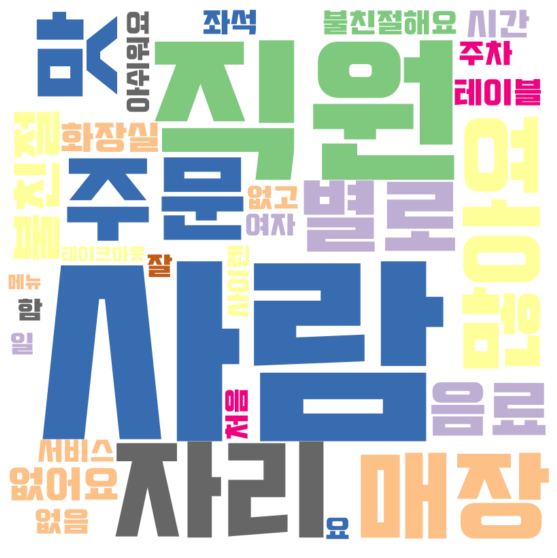

In [ ]:
# 워드 클라우드 Top30
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/TYPO_SSANGMUNDONGB.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 30,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

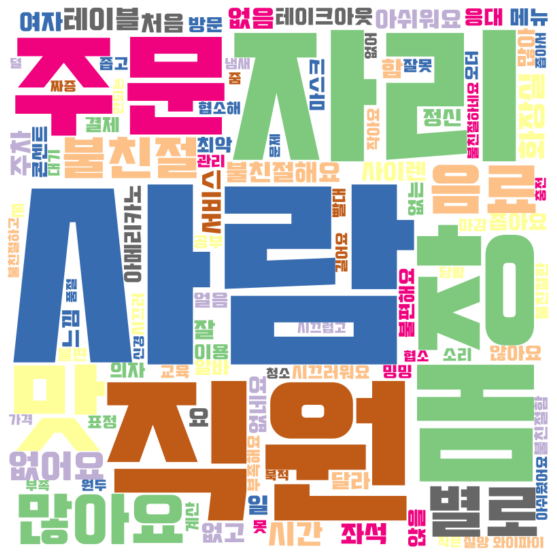

In [ ]:
# 워드 클라우드 Top50
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/TYPO_SSANGMUNDONGB.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 100,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

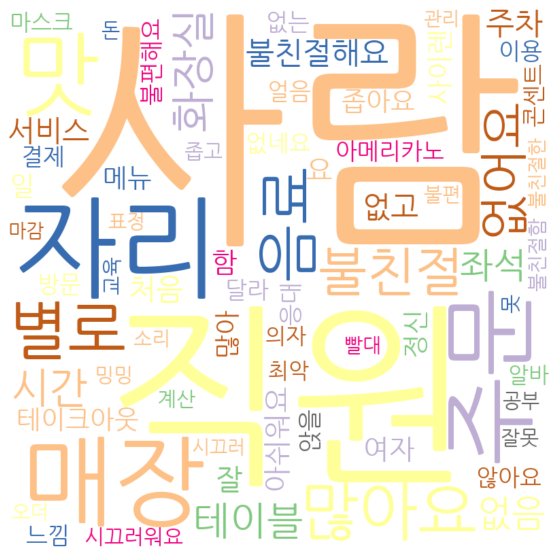

In [ ]:
# 워드 클라우드 Top70
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = 'D:/글씨체/NanumGothic.ttf',  
    background_color='white',                        
    colormap = 'Accent_r',     
    max_words = 70,                          
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

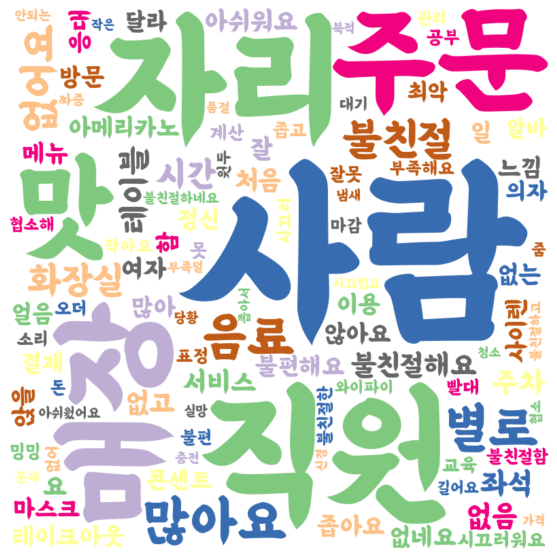

In [ ]:
# 워드 클라우드 Top100
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/BMEULJIROTTF_0.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 100,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')

In [ ]:
# 워드 클라우드 Top100
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import matplotlib 
from matplotlib import rc
from wordcloud import WordCloud

%matplotlib inline 
rc('font', family='NanumBarunGothic')

#wordcloud의 세부 내용을 구성 
wordcloud = WordCloud(
    font_path = './font/BMEULJIROTTF_0.TTF',  
    background_color='white',                        
    colormap = 'Accent_r',                               
    width = 800,
    height = 800,
    max_words = 100,
    max_font_size = 300,
)

wordcloud_words = wordcloud.generate_from_frequencies(token)

array = wordcloud.to_array()
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('worldcloud_starbucks.png')